## SyriaTel Customer Churn Prediction

## 1. Introduction and Overview

### 1.1 Overview

SyriaTel is one of the major telecommunications company in Syria, known for providing mobile and internet services across the country. It was founded in 2000 and is one of the two main mobile network operators in Syria, the other being MTN Syria. SyriaTel provides voice, data, and messaging services, including prepaid and postpaid mobile plans. The company has faced numerous challenges due to the Syrian civil war, including infrastructure damage, economic sanctions, and political instability. These factors have impacted its operations and financial performance over the years.

Customer churn is where customers stop using a company's product or service over a given period of time. It is a critical metric for businesses as it directly impacts profitability and growth. The project's goal is to build a machine learning model to predict whether a customer will ("soon") stop doing business with SyriaTel. By analyzing customer data, the model will enable SyriaTel to pinpoint customers most likely to discontinue their service, enabling targeted retention strategies.

### 1.2 CRISP-DM Methodology

This project will follow the ***CRoss-Industry Standard Process for Data Mining (CRISP-DM)*** methodology to organize and structure the data science process. The process is iterative and consists of six main phases:

 1. **Business Understanding**
 2. **Data Understanding**
 3. **Data Preparation**
 4. **Modeling**
 5. **Evaluation**
 6. **Deployment** *(the model will not be deployed in this project)*

The methodology's iterative approach enables a return to previous steps as needed, based on the discovery of new information or the encounter of challenges. This flexibility contributes to the creation of a robust solution that aligns with the needs of the business.

## 2. Business Understanding

### 2.1 Business Problem

SyriaTel has been experiencing customer churn and to get ahead of the situation the company seeks to predict whether their customers will soon leave the company and factors leading to it. Key stakeholders in this project will be:
 - **Customer Relationship Management (CRM) Team:** to use the churn prediction insights to design retention strategies.
 - **Marketing Team:** to design and execute personalized campaigns based on the predicted churn risk and identified churn factors.
 - **Customer Service/Support Team** to proactively reach out to at-risk customers, improving service quality and addressing issues that may lead to churn.

### 2.2 Objectives

 - Develop a Churn Prediction Model: Build a Logistic Regression model to predict the likelihood of customers leaving SyriaTel, enabling the company to identify at-risk customers before they churn.

 - Identify Key Churn Drivers: Analyze the model's outputs to determine the most significant factors contributing to customer churn.

 - Enable Proactive Retention Strategies:Use the insights from the model to design targeted interventions aimed at retaining at-risk customers.

## 3. Data Understanding

This section will explore the data to become familiar with its characteristics as well as identify data quality issues and gather initial insights to guide further analysis.

In [1]:
#importing the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_validate,cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Loading and previewing the telecom dataset
df = pd.read_csv('telecom.churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Now, I will explore the data to gain insights about the data.

In [3]:
# Previewing the top of our dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Previewing the bottom of our dataset
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
# Checking the dimensions of the data
df.shape

(3333, 21)

 This output shows:
 
 - Number of Rows (Observations): There are 3333 rows in the DataFrame.
 - Number of Columns (Variables): There are 21 columns (or variables) in the DataFrame.

In [6]:
# Checking on the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
#Checking columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

From the output these are the columns in our data and their descriptions based on a review of our data and information from our data source:

 - **state:** The state of the customer.
 - **account length:** The length of the account in days or months.
 - **area code:** The area code of the customer's phone number.
 - **phone number:** The phone number of the customer.
 - **international plan:** Whether the customer has an international plan or not.
 - **voice mail plan:** Whether the customer has a voicemail plan or not.
 - **number vmail messages:** The number of voicemail messages the customer has.
 - **total day minutes:** Total minutes of day calls.
 - **total day calls:** Total number of day calls.
 - **total day charge:** Total charge for the day calls.
 - **total eve minutes:** Total minutes of evening calls.
 - **total eve calls:** Total number of evening calls.
 - **total eve charge:** Total charge for the evening calls.
 - **total night minutes:** Total minutes of night calls.
 - **total night calls:** Total number of night calls.
 - **total night charge:** Total charge for the night calls.
 - **total intl minutes:** Total minutes of international calls.
 - **total intl calls:** Total number of international calls.
 - **total intl charge:** Total charge for the international calls.
 - **customer service calls:** Number of times the customer called customer service.
 - **churn:** Whether the customer churned or not (True/False).

## 4. Data Preparation

Here I will clean and preprocess the data, including selecting relevant features, handling missing values, and transforming data into the desired format for modeling.

 - First I'll check for any **missing values.**

In [8]:
# Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the output I can conclude there are no missing values within this dataset.

 - I'll then check for any **duplicates.**

In [9]:
# Checking for duplicates
df.duplicated().sum()

0

From the output I can conclude there are no duplicate values within this dataset.

In [10]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


 - **Column dropping:** I'll drop the `phone number` column as it’s not useful for modeling.

In [13]:
# Dropping the 'phone number' column
df = df.drop(columns=['phone number'])

# Verifying that the column has been dropped
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The target variable is `churn`. It is a binary variable which I'll be solving a classification problem for. I'll take a look at the distribution of `churn`.

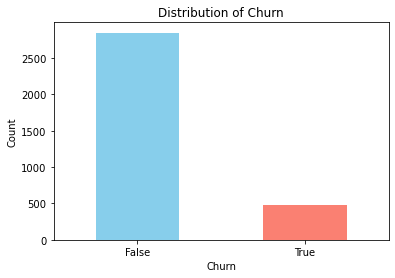

In [14]:
# Plotting the distribution of the 'churn' column
plt.figure(figsize=(6, 4))
df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()

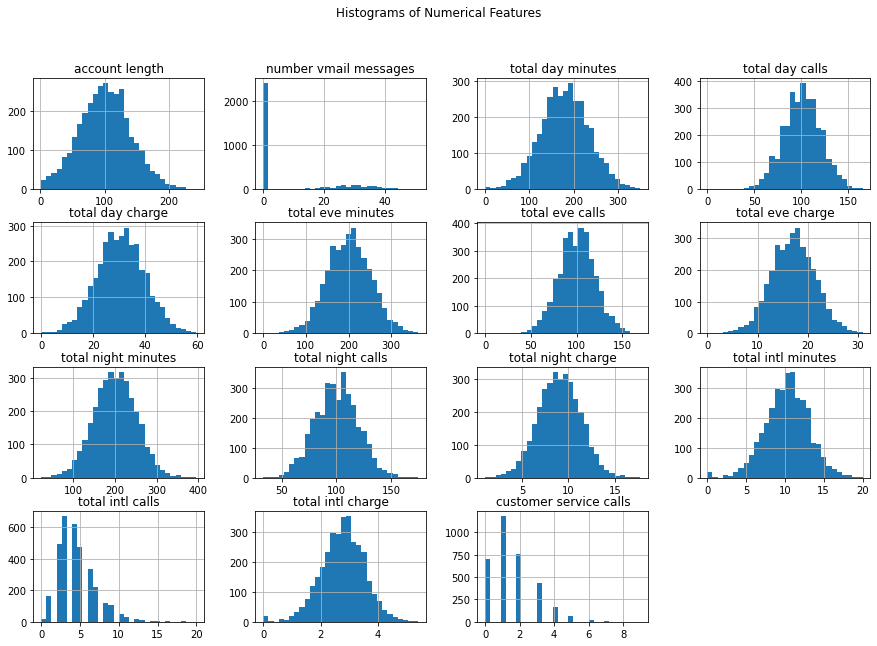

In [15]:
# Plotting distributions of numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                       'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                       'total night minutes', 'total night calls', 'total night charge', 
                       'total intl minutes', 'total intl calls', 'total intl charge', 
                       'customer service calls']

df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()